##### **This notebook illustrates techniques for detecting multicollinearity in regression models and explores remedies such as Variance inflation factor (VIF) analysis and Recursive feature elimination (RFE).**  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.datasets import fetch_california_housing

In [20]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [21]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [22]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
df['MedHouseVal(Target)'] = data.target

In [24]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal(Target)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### **Multicollinearity in Regression**  

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate their individual effects on the target variable. This can lead to unstable coefficient estimates and reduced model interpretability.  

**Detection methods:**  
- **Pairwise correlation**: Identifies strong linear relationships between two features but **Multicollinearity** refers to a situation where a feature is highly correlated with a **combination of multiple other features**. This cannot be fully captured by simple pairwise correlation. Although can be visualised using:   
- **Cluster maps**: Visualizes correlations across multiple variables.  

**Treatment methods (commonly used):**  
- **Variance Inflation Factor (VIF):** Measures how much the variance of a regression coefficient is inflated due to multicollinearity. Variables with high VIF are usually considered for removal.  
- **Recursive Feature Elimination (RFE):** A feature selection technique that iteratively fits the model, ranks features by importance, and removes the least significant until the optimal set is obtained.  

These approaches help reduce redundancy, stabilize regression coefficients, and improve model reliability.  



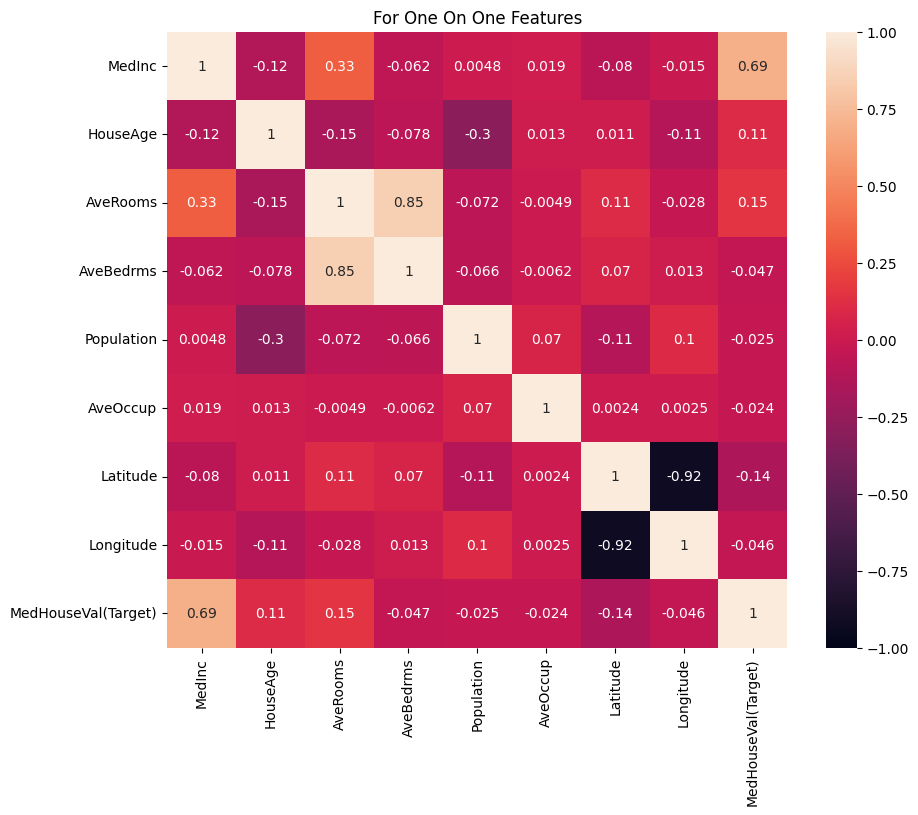

In [25]:
plt.figure(figsize=(10,8))                              
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('For One On One Features')
plt.show()

##### **Clustermap table shows group(cluster) relationships**

<Figure size 1000x800 with 0 Axes>

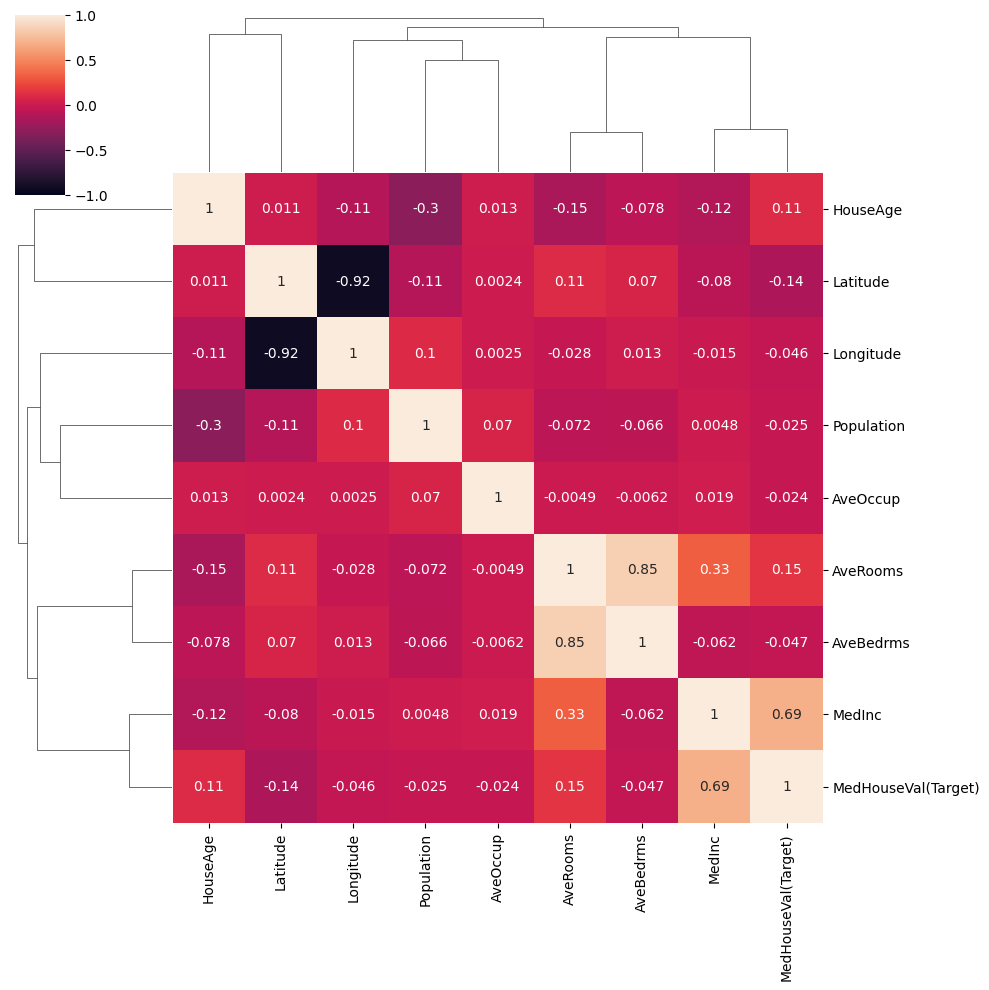

In [26]:
plt.figure(figsize=(10,8))                              
sns.clustermap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

##### **Dendrograms in** `sns.clustermap`

- In `sns.clustermap`, the **trees are called dendrograms**.
- **Dendrograms** represent the **hierarchical clustering structure**.
- They **do not show exact numerical values directly**, but:
  - The **branch lengths indicate relational strength** or dissimilarity.
  - **Shorter branches** → more similar clusters.
  - **Longer branches** → less similar clusters.
- Exact numerical distances are calculated internally but are **not displayed** by default.
- To view distances:
  - Use `scipy.cluster.hierarchy.linkage` for linkage matrix.
  - Plot dendrograms with `scipy.cluster.hierarchy.dendrogram` and set `show_contracted=True` or similar options.

---


#### **Variance Inflation factor (VIF)**

VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity with other features.  


##### <u>**Mathematical Formulation**</u>
Suppose you have features $X_1, X_2, \dots, X_p$. For a specific feature $X_j$:  

1. Regress $X_j$ on all **other features**:  
$$
X_j = \beta_0 + \beta_1 X_1 + \dots + \beta_{j-1}X_{j-1} + \beta_{j+1}X_{j+1} + \dots + \beta_p X_p + \epsilon
$$

2. Compute the coefficient of determination $R_j^2$ for this regression.

3. **VIF formula**:  
$$
\text{VIF}(X_j) = \frac{1}{1 - R_j^2}
$$

- If $R_j^2$ is high (e.g., 0.9), then $1 - R_j^2 = 0.1$ → $\text{VIF} = 10$.  
- This means $X_j$ is highly collinear with other features.


##### <u>**How it’s used**</u>
1. Compute VIF for all features.  
2. **Threshold**: VIF ≥ 10 → high multicollinearity.  
3. Drop the feature with the **highest VIF**.  
4. Recompute VIF for remaining features.  
5. Repeat until all VIFs < 10.  




In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
features_df = df.drop('MedHouseVal(Target)', axis=1)
features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
vif = pd.DataFrame()
vif['Features'] = features_df.columns
vif['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(len(features_df.columns))]

In [33]:
vif

,Features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


- Latitude and Longitude often show **very high VIF** due to strong correlation between them. However, they are significant features because **together they define the geographical location**, which is crucial for models like **house price prediction**.

- **Approach 1**: Combine Latitude and Longitude
    - Instead of using them as separate features, **combine them into a single derived feature** using the formula for Euclidean distance from city center. 

- **Approach 2**: Keep Both Features
    - If **both are significant** for model performance:
    - You can **keep them despite high VIF**.
    - High VIF indicates multicollinearity, but if it **does not cause instability in model coefficients or interpretability issues**, it is acceptable, especially in linear models.
    - Alternatively, tree-based models are **not affected by multicollinearity**.




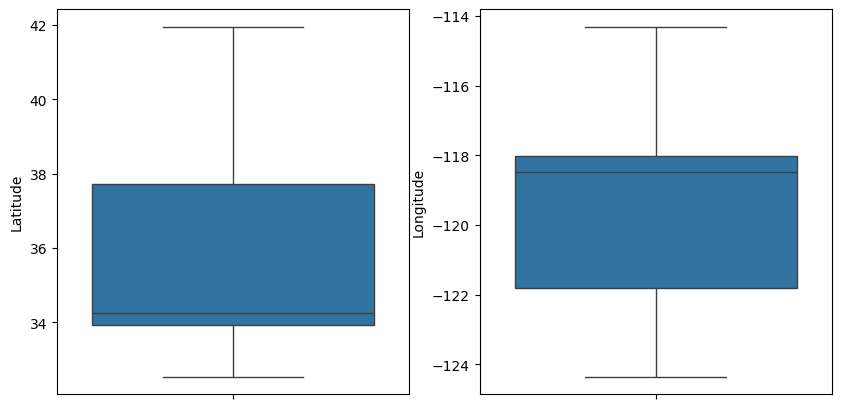

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=features_df['Latitude'])
plt.subplot(1,2,2)
sns.boxplot(data=features_df['Longitude'])
plt.show()


- Since no outliers, Using dataset mean as center is statistically neutral
- But since we are using the California Housing Dataset, using California’s geographical center will be good for 
absolute interpretation as distance from state center.

In [43]:
center_lat = 37.2510
center_long = -119.7513

# Euclidean distance from city center
features_df['distance_from_center'] = ((features_df['Latitude'] - center_lat)**2 + (features_df['Longitude'] - center_long)**2)**0.5


In [46]:
features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,distance_from_center
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.557263
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.542707
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.559771
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.569495
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,2.569495
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,2.600107
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,2.672251
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,2.627760
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,2.684932


In [47]:
features_df.drop(['Latitude','Longitude'], axis=1, inplace=True)

In [48]:
features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,distance_from_center
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,2.557263
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,2.542707
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,2.559771
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,2.569495
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,2.569495
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,2.600107
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,2.672251
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,2.627760
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,2.684932


In [50]:
vif = pd.DataFrame()
vif['Features'] = features_df.columns
vif['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(len(features_df.columns))]

In [51]:
vif

,Features,VIF
0,MedInc,9.040733
1,HouseAge,4.808446
2,AveRooms,43.309091
3,AveBedrms,37.987632
4,Population,2.489107
5,AveOccup,1.094854
6,distance_from_center,7.182108


- Generally, in real-world projects, **feature removal decisions are made after consultation with the business team or domain experts**, to ensure no critical business information is lost.

- However, **for this analysis**, we are focusing on demonstrating **multicollinearity detection and treatment** using VIF. Therefore, we will proceed to **drop features with high VIF values (e.g. AvgRooms) one by one**, purely from a statistical perspective to improve model stability.



In [52]:
features_df.drop('AveRooms', axis=1, inplace=True)

vif = pd.DataFrame()
vif['Features'] = features_df.columns
vif['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(len(features_df.columns))]

In [53]:
vif

,Features,VIF
0,MedInc,4.224979
1,HouseAge,4.498255
2,AveBedrms,4.733738
3,Population,2.442539
4,AveOccup,1.094667
5,distance_from_center,6.817688


- Now all the features vif is below 10, so we can build the model

In [54]:
features_df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,distance_from_center
0,8.3252,41.0,1.023810,322.0,2.555556,2.557263
1,8.3014,21.0,0.971880,2401.0,2.109842,2.542707
2,7.2574,52.0,1.073446,496.0,2.802260,2.559771
3,5.6431,52.0,1.073059,558.0,2.547945,2.569495
4,3.8462,52.0,1.081081,565.0,2.181467,2.569495
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,2.600107
20636,2.5568,18.0,1.315789,356.0,3.122807,2.672251
20637,1.7000,17.0,1.120092,1007.0,2.325635,2.627760
20638,1.8672,18.0,1.171920,741.0,2.123209,2.684932


In [55]:
X = features_df
Y = df['MedHouseVal(Target)']

In [56]:
X, Y

(       MedInc  HouseAge  AveBedrms  Population  AveOccup  distance_from_center
 0      8.3252      41.0   1.023810       322.0  2.555556              2.557263
 1      8.3014      21.0   0.971880      2401.0  2.109842              2.542707
 2      7.2574      52.0   1.073446       496.0  2.802260              2.559771
 3      5.6431      52.0   1.073059       558.0  2.547945              2.569495
 4      3.8462      52.0   1.081081       565.0  2.181467              2.569495
 ...       ...       ...        ...         ...       ...                   ...
 20635  1.5603      25.0   1.133333       845.0  2.560606              2.600107
 20636  2.5568      18.0   1.315789       356.0  3.122807              2.672251
 20637  1.7000      17.0   1.120092      1007.0  2.325635              2.627760
 20638  1.8672      18.0   1.171920       741.0  2.123209              2.684932
 20639  2.3886      16.0   1.162264      1387.0  2.616981              2.589670
 
 [20640 rows x 6 columns],
 0        4

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [59]:
X_train, X_test

(       MedInc  HouseAge  AveBedrms  Population  AveOccup  distance_from_center
 5748   2.9148      15.0   1.105532      3164.0  2.692766              3.427613
 5592   3.1779      41.0   1.054825      1658.0  3.635965              3.759438
 2110   2.5111      49.0   0.964361      1290.0  2.704403              0.501002
 13901  2.5405      15.0   1.422326      2568.0  2.388837              4.512968
 18425  4.5033       7.0   1.101173      1739.0  2.549853              2.078719
 ...       ...       ...        ...         ...       ...                   ...
 10955  1.7823      17.0   1.087156      1079.0  2.474771              3.960915
 17289  8.5608      42.0   1.011538       753.0  2.896154              2.833597
 5192   1.1326      42.0   1.006826       775.0  2.645051              3.640469
 12172  2.6322      10.0   0.951782      1323.0  2.773585              4.371759
 235    2.3036      35.0   1.176923      1009.0  2.587179              2.507320
 
 [14448 rows x 6 columns],
        Med

In [60]:
Y_train, Y_test

(5748     2.38700
 5592     1.71100
 2110     0.55400
 13901    0.69600
 18425    2.13100
           ...   
 10955    2.05300
 17289    5.00001
 5192     1.04800
 12172    1.40700
 235      1.26000
 Name: MedHouseVal(Target), Length: 14448, dtype: float64,
 4712     3.550
 2151     0.707
 15927    2.294
 82       1.125
 8161     2.254
          ...  
 11387    2.113
 2523     0.875
 18897    1.098
 18878    1.625
 4287     1.667
 Name: MedHouseVal(Target), Length: 6192, dtype: float64)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
model.coef_

array([ 4.38179245e-01,  1.90281891e-02,  4.32410461e-02,  3.05225566e-05,
       -4.11252822e-03,  6.94227303e-02])

In [65]:
model.intercept_

np.float64(-0.4613631809664702)

In [67]:
Y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [70]:
r2_score(Y_test, Y_pred)

0.5075090644573141

In [71]:
root_mean_squared_error(Y_test,Y_pred)

0.8046548942577036

- Here the no of features were low, thats why we dropped the features one by one and checked each time
- For significantly large number of features we can implement RFE(Recursive Feature Elimination)

In [74]:
features_df = df.drop('MedHouseVal(Target)',axis=1)
features_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [75]:
from sklearn.feature_selection import RFE

In [76]:
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [77]:
Y = df['MedHouseVal(Target)']
rfe.fit(features_df, Y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [78]:
rfe.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [79]:
features_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [80]:
rfe.ranking_

array([1, 2, 1, 1, 4, 3, 1, 1])

In [ ]:
rfe.predict(features_df) # since the train test split was not done, so we used features_df directly (just for demonstration)

array([3.98910415, 4.03191679, 3.44103761, ..., 0.22630645, 0.36574672,
       0.57907858], shape=(20640,))